In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [18]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [19]:
##In this workbook, we will be working with the Wide receiver Position
fb=df[df['Position'] == 'FB']
fbcorr = fb.corr()
fbpos = fbcorr[fbcorr['Overall Rating'] >= 0.5]
fbneg = fbcorr[fbcorr['Overall Rating'] <= -0.5]
print(fbpos['Overall Rating'], fbneg['Overall Rating'])
#Here are the significant correlations for the wide receiver position

Awareness          0.847742
Impact Blocking    0.587075
Overall Rating     1.000000
Name: Overall Rating, dtype: float64 Series([], Name: Overall Rating, dtype: float64)


In [20]:
fbsig = fb[['Awareness', 'Impact Blocking']]
X = add_constant(fbsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Since all of our vif scores are below 5, we can move on to statistical summary testing

const              97.435544
Awareness           1.199452
Impact Blocking     1.199452
dtype: float64

In [21]:
FB = sm.OLS(fb['Overall Rating'], fbsig).fit()
print(FB.summary())
#All of our variables are significant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.151e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           5.52e-92
Time:                        10:09:13   Log-Likelihood:                -212.78
No. Observations:                  75   AIC:                             429.6
Df Residuals:                      73   BIC:                             434.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.4696      0.043     

In [22]:
def model():
    pv= 0.4696*fb['Awareness'] + 0.5756* fb['Impact Blocking']
    return pv

In [23]:
fb['Predicted Value'] = model()
fb['Residual'] = fb['Predicted Value'] - fb['Overall Rating']

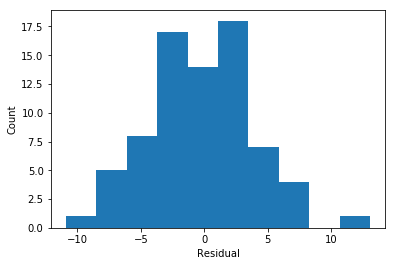

In [24]:
plt.hist(fb['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

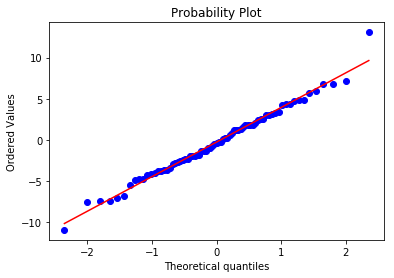

In [26]:
stats.probplot(fb['Residual'], plot=plt)
plt.show()
#It looks like there might be an outlier in the top right corner. Let's see how much leverage that point has

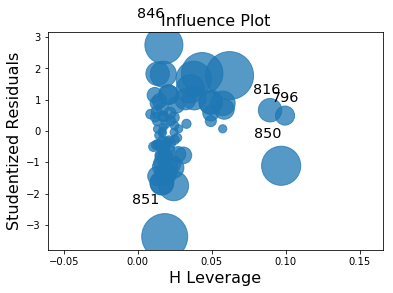

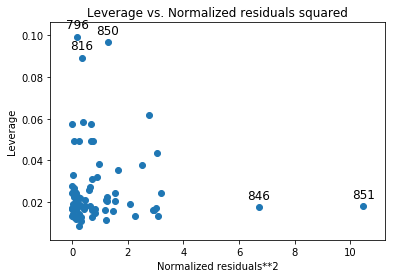

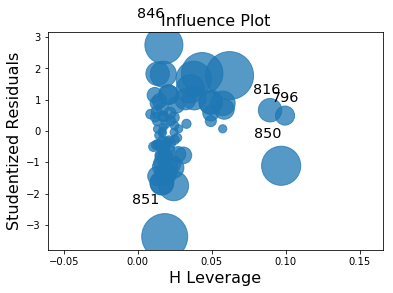

In [28]:
#Next we will check for influence and leverage points
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(FB)
influence_plot(FB)
#There is one high residual point (3723) but it does not have a very high leverage so we will leave it in the data
#The outlier point from the previous graph is very low leverage so we will keep it in the model

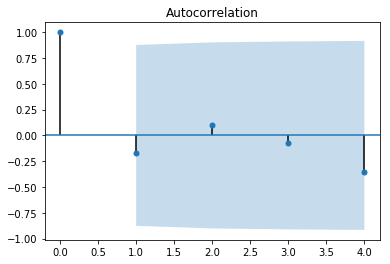

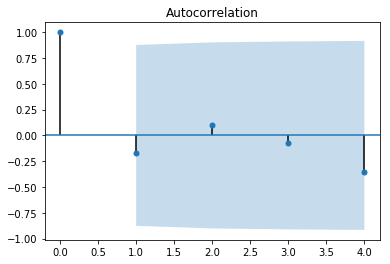

In [31]:
##Next we will double check for autocorrelation.  According to the Durbin Watson statistic, there is not a significant amount
#of auto correlation
fbcleansig1 = fb[['Overall Rating', 'Awareness', 'Impact Blocking', 'Predicted Value', 'Residual']]
fbcleancorr = fbcleansig1.corr()
plot_acf(fbcleancorr['Overall Rating'])
#There does not appear to be a significant amount of autocorrelation in the model
#The Durbin Watson statistic of 1.804 supports this

In [34]:
#Finally, we move on to the Breusch Pagan test to check for heteroskedasticity
het_breuschpagan(fb['Residual'], fbsig)
#Based on the extremely low p-values, we can reject the null that there is heteroskedasticity present in the model

(22.21567668714165,
 2.4367604431155458e-06,
 15.361989094272245,
 2.7020592350335035e-06)

In [44]:
#Now that we have determined that we can use linear regression, let's run some tests and see how accuract our linear 
#regression model is
X_train, X_test, y_train, y_test = train_test_split(fbsig, fb['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
fbcv = cross_val_score(reg, fbsig, fb['Overall Rating'], cv=5)
fbcv_mean = np.mean(fbcv)
print(fbcv, fbcv_mean)
#On average, it looks like our model explains 75.75% of the variation in the data

[0.72061033 0.81763552 0.91782338 0.7098281  0.62179839] 0.7575391438755604


In [46]:
fbdesc = fb[['Overall Rating', 'Awareness', 'Impact Blocking', 'Predicted Value', 'Residual']]
fbdescribe = fbdesc.describe()

In [47]:
fbdescribe.to_csv('C:\\Users\\tilleymusprime\\Desktop\\fbdescribe.csv')